# Fraude nas Eleições?

Após escultar o podcast [**Naruhodo #154**](https://www.b9.com.br/98315/naruhodo-154-o-que-e-a-lei-de-benford/), soube que um vídeo ficou popular falando sobre [possíveis fraudes nas eleições de 2014](https://www.youtube.com/watch?v=FgpYrXN00Sw&ab_channel=BrasilParalelo). Motivado pela discussão do episódio, fui mais a fundo no assunto. 
No vídeo, apesar das acusações, o estudo divulgado não é detalhado. Ou seja, a metodologia usada para encontrar os resultados não está disponível (pública). Portanto, não podemos ter a replicabilidade exata dos resultados (ou conferí-los). 

Após algumas leituras sobre a utilização da **Lei de Benford na auditação de eleições** <sup>[[1]](https://web.archive.org/web/20140517120934/http://vote.caltech.edu/sites/default/files/benford_pdf_4b97cc5b5b.pdf) [[2]](https://aip.scitation.org/doi/10.1063/1.166498) [[3]](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00919.x)</sup>, vi que a sua utilização é no mínimo questionável. Como o vídeo não traz um estudo em sí, apenas os resultados tentarei replicá-los baseando-me apenas na aplicação da Lei de Benford. Os dados analizá-dos serão os das eleições para presidente de 2014. 
___



## 1. O que é a Lei de Benford?
A lei de Benford ou lei do primeiro dígito é uma observação da distribuição de dígitos presente em várias conjuntos de números reais. Simplificadamente, a **lei diz que o primeiro dígito significante é provavelmente pequeno**. Esse [vídeo](https://www.youtube.com/watch?v=XXjlR2OK1kM&ab_channel=Numberphile) do [Numberphille](https://www.youtube.com/channel/UCoxcjq-8xIDTYp3uz647V5A) traz uma ótima explicação sobre o assunto.

Matematicamente, a Lei de Benford diz que probabilidade da ocorrencia do dígito $n$ na primeira posição em uma conjunto de números segue a seguinte equação:

$$
P(n) = \log_{10}\left(1 + \frac{1}{n}\right)
$$

Por exemplo, a distribuição dos primeiro dígito da população de 237 países em Julho de 2010, indica uma distribuição que segue a Lei de Benford.

![Fonte: Wikipedia](https://upload.wikimedia.org/wikipedia/commons/0/0b/Benfords_law_illustrated_by_world%27s_countries_population.png "Fonte: https://en.wikipedia.org/wiki/Benford%27s_law")

### Restrições
Apesar de vários conjuntos de dados seguirem essa distribuição, exitem algumas condições.

- Os dados devem abrangir várias ordens de magnitude de maneira **relativamente** uniforme.
- **Flutuações multiplicativas** geram essa distribuição (sequencia de produtos de probabilidades)



___
# Aplicando a Lei de Benford

Vamos primeiro aplicar a lei em alguns dados públicos e verificar sua eficácia. O passo-a-passo abaixo mostra o que feito com os dados de cada exemplo.
- **Visualização**.
- **Limpar/Filtragem**.
- **Análise**.
- **Resultados**.
- **Métricas**.


Antes de prosseguirmos nas análise, vamos garantir que algumas bibliotecas necessárias estão atualizadas e algumas configurações feitas.


In [1]:
# Atualizar alguns packages
!pip install seaborn --upgrade

# Configurações de exibição
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', 6)


    100% |████████████████████████████████| 215kB 26.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


## 1. Dados de Eleitores por Município
Primeiro, vamos verificar se a quantidade de eleitores por município segue o padrão descrito na lei de Benford. É uma estimativa razoável, já que a quantidade de eleitores é proporcional a de habitantes. Os dados usados nessa análise foram retirados dos site do [TSE](http://www.tse.jus.br/eleitor/estatisticas-de-eleitorado/quantitativo-do-eleitorado) dia 27 de Outubro de 2018 e correspondem a **quantidade de eleitores por município em 2014**.

Primeiro, vamos **importar os dados do TSE** e dá uma olhada neles.


In [3]:
import pandas as pd

# Importa os dados coletados do TSE
url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/eleitorado_municipio_2014.csv"
eleitores = pd.read_csv(url, header=0, encoding='latin-1', sep=";")

def visualizar(df):
    # Mostra as primeiras linhas dos dados
    display(df.head())

    # Informações sobre os dados
    display(df.info())

visualizar(eleitores)

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,...,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
0,2014,1,Brasil,N,Norte,AC,Acre,1120,ACRELÂNDIA,9144,...,16,3,0,1,0,0,57,9087,12,0
1,2014,1,Brasil,N,Norte,AC,Acre,1570,ASSIS BRASIL,5189,...,8,0,0,0,0,0,5163,26,10,0
2,2014,1,Brasil,N,Norte,AC,Acre,1058,BRASILÉIA,17131,...,77,16,7,0,0,0,139,16992,22,0
3,2014,1,Brasil,N,Norte,AC,Acre,1007,BUJARI,6902,...,5,0,0,0,0,0,6886,16,7,0
4,2014,1,Brasil,N,Norte,AC,Acre,1015,CAPIXABA,6941,...,10,4,0,1,0,0,54,6887,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5738 entries, 0 to 5737
Data columns (total 43 columns):
NR_ANO_ELEICAO                     5738 non-null int64
CD_PAIS                            5738 non-null int64
NM_PAIS                            5738 non-null object
SG_REGIAO                          5738 non-null object
NM_REGIAO                          5738 non-null object
SG_UF                              5738 non-null object
NM_UF                              5738 non-null object
CD_MUNICIPIO                       5738 non-null int64
NM_MUNICIPIO                       5738 non-null object
QTD_ELEITORES                      5738 non-null int64
QTD_ELEITORES_FEMININO             5738 non-null int64
QTD_ELEITORES_MASCULINO            5738 non-null int64
QTD_ELEITORES_NAOINFORMADO         5738 non-null int64
QTD_ELEITORES_MENOR16              5738 non-null int64
QTD_ELEITORES_16                   5738 non-null int64
QTD_ELEITORES_17                   5738 non-null int64
QTD_ELE

None

Já podemos perceber que temos 5738 de municípios de votação (Incluindo Exterior).
A coluna que nos iteressa é:
 - **QTD_ELEITORES**: Quantidade de eleitores por município.

In [4]:
def filter_and_clean(df, col):
    """
    Filtra e limpa os dados, em seguida mostra o resultado final.
    """
    # Filtra os dados
    df = df[[col]]
    df = df.dropna()

    # Após a limpeza
    print(df.info())
    
    print("\n\n Total:" + str(df[col].astype('float64').sum()) + "\n\n")
    display(df.head(10))
    
    return df
  
col = "QTD_ELEITORES"

eleitores = filter_and_clean(eleitores, col)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5738 entries, 0 to 5737
Data columns (total 1 columns):
QTD_ELEITORES    5738 non-null int64
dtypes: int64(1)
memory usage: 89.7 KB
None


 Total:142822046.0




,QTD_ELEITORES
0,9144
1,5189
2,17131
3,6902
4,6941
5,51483
6,10412
7,18597
8,4312
9,5993


 De acordo com o [TSE](http://www.tse.jus.br/imprensa/noticias-tse/2018/Agosto/brasil-tem-147-3-milhoes-de-eleitores-aptos-a-votar-nas-eleicoes-2018), de fato, tivemos 142.822.046 eleitores em 201. Assim, podemos continuar nossa análise.
 
Antes de continuar a análise, vamos dá uma olhada na distribuição dos valores que estamos analisando, **Quantidade de Eleitores**.
 

Valor mínimo: 1.0
Valor máximo: 8782406.0


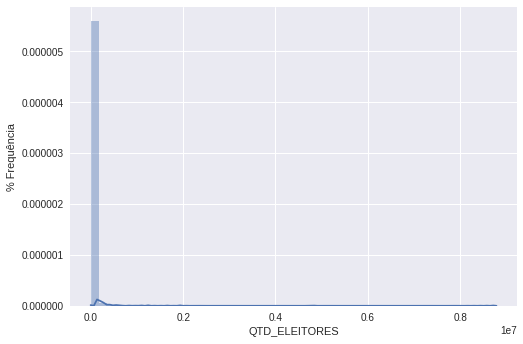

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_dist(df, col):
  with sns.axes_style('darkgrid'):
      f, ax = plt.subplots()
      sns.distplot(df[col].astype('float64'), ax=ax)

      ax.set_ylabel("% Frequência")

  print("Valor mínimo: " + str(df[col].astype('float64').min()))
  print("Valor máximo: " + str(df[col].astype('float64').max()))
  
show_dist(eleitores, col)

Os valores possuem distribuição de cauda longa e estão definidos em um intervalo de várias ordens de grandeza $[1, 8782406]$.

Agora vamos escrever uma função que coletar as **distribuições dos dígitos presentes nesses dados**.


In [6]:
# Função que coleta a frequência dos primeiros dígitos.
def fd_freq(df, col):
    """
    Retorna a distribuição dos primeiros dígitos da coluna especificada.

    > df: DataFrame de análise
    > col: Coluna que será analisada.
    < df_freq: DataFrame com os resultados;

    """
    # lista de dígitos 1...9
    digits = [str(d) for d in range(1, 10)]
    columns = ["Ocorrências", "Porcentagem"]
    df_freq = pd.DataFrame(index=digits, columns=columns)

    # Para cada dígito
    for d in digits:
        # Total de observações do dígito na primeira posição
        total = df[col].apply(lambda x: str(x)[0] == d).sum()
        
        # Salvo no df
        df_freq.loc[d, "Ocorrências"] = total
        df_freq.loc[d, "Porcentagem"] = total / df.shape[0]
        
    return df_freq

first_digit_freq = fd_freq(eleitores[col])

display(first_digit_freq)
  

,Ocorrências,Porcentagem
1,1588,0.276751
2,986,0.171837
3,779,0.135762
4,587,0.1023
5,526,0.0916696
6,397,0.0691879
7,333,0.0580342
8,301,0.0524573
9,241,0.0420007


Hmm.. Esses resultados parecem bem próximos dos previstos na Lei de Benford, **vamos plotar os gráficos**.

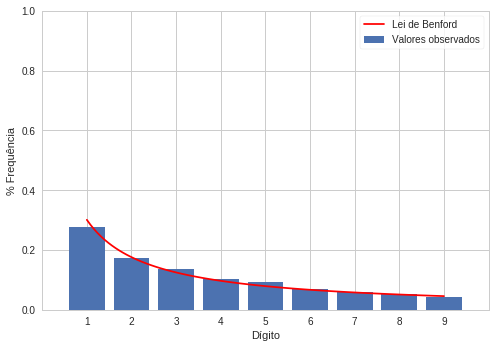

In [24]:
import numpy as np

def result_vs_benford(series):
    with sns.axes_style("whitegrid"):
      f, ax = plt.subplots()
      # Plot dos valores observados
      x_o = series.index.values.astype(int)
      y_o = series.values
      ax.bar(x_o, y_o, label="Valores observados")

      # Plot da Lei de Bendford
      x = np.linspace(1, 9, 100)
      y = np.log10(1 + (1/x))
      ax.plot(x, y, label = "Lei de Benford", c='r')

      ax.set_xlabel("Dígito")
      ax.set_ylabel("% Frequência")
      ax.set_xticks(x_o)
      ax.set_ylim((0, 1))
      ax.set_xlim((0, 10))
      ax.legend(frameon=True)
    
result_vs_benford(first_digit_freq["Porcentagem"])



Podemover que os resultados estão bem próximos do descrito pela Lei de Benford. Mas quão próximos podemos definir esses resultados? Para isso, vamos tentear responder a seguinte frase, através das etapas descritas.

**Os dados possuem a distribuição definida pela Lei de Benford?**

- Dados serão **simulados** aplicando a técnica de **bootstrap**, para que possamos criar um intervalo de confiança.
- A **frequência de cada dígitos** será usada como a estatística.
- A **estatística** será definida para cada simulação.
- Por fim, teremos um **intervalo de confiança** para cada frequência dos dígitos.

Muita coisa, não é? Os detalhes dessa metodologia está descrita [aqui](https://web.williams.edu/Mathematics/sjmiller/public_html/math/papers/st/YangLu.pdf).

Vamos por partes.

Primeiro, definir melhor os dados observados como uma sequência de primeiros dígitos.

In [25]:
# Dados observados
def fd_data(df, col):
    """
    Retorna os dados que correspondem a cada dígito na primeira posição

    > df: DataFrame de análise
    > col: Coluna que será analisada.
    < series_data: DataFrame com os resultados;

    """
    # lista de dígitos 1...9
    columns = ["Dados"]

    series_data = df[col].apply(lambda x: str(x)[0]).copy()
        
    # Salvo no df
    series_data.name= "Dados"
    
    return series_data

first_digit_data = fd_data(eleitores, col)
metrics = first_digit_data.value_counts()/first_digit_data.count()
display(metrics)

1    0.276751
2    0.171837
3    0.135762
4    0.102300
5    0.091670
6    0.069188
7    0.058034
8    0.052457
9    0.042001
Name: Dados, dtype: float64

Agora, vamos criar as sequências de ** amostras bootstrap** desses dados e sua **estatística de teste**.

In [42]:
# Para replicabilidade
np.random.seed(42)

# Cria os bootstraps e calcula as estastísticas.
def bootstrap_replicates(data):
    # Amostragem dos dados obtidos
    bs_sample = pd.Series(np.random.choice(data, len(data)))
    
    # Métrica dos dados
    return bs_sample.value_counts() / bs_sample.count()
  
def estimate_interval(data, samples=10000, conf_int = 0.95):
    # Inicializa os resultados
    digits = [str(d) for d in range(1, 10)]
    bs_df = pd.DataFrame(columns=digits)
    for i in range(samples):
        bs_rep = bootstrap_replicates(data)
        bs_df = bs_df.append(bs_rep, ignore_index=True)
        
    interval = bs_df.quantile([(1 - conf_int) / 2, conf_int + (1 - conf_int) / 2], axis=0)
    return interval
  
int_90 = estimate_interval(first_digit_data, conf_int=0.9)
display(int_90)

,1,2,3,4,5,6,7,8,9
0.05,0.267341,0.163994,0.128442,0.095678,0.085396,0.063785,0.053154,0.047752,0.037644
0.95,0.286511,0.180202,0.143255,0.108749,0.097944,0.074765,0.063088,0.057337,0.046532


Agora, podemos plotar o resultado novamente, e checar se está dentro da margem descrita por esses limites de 95%.

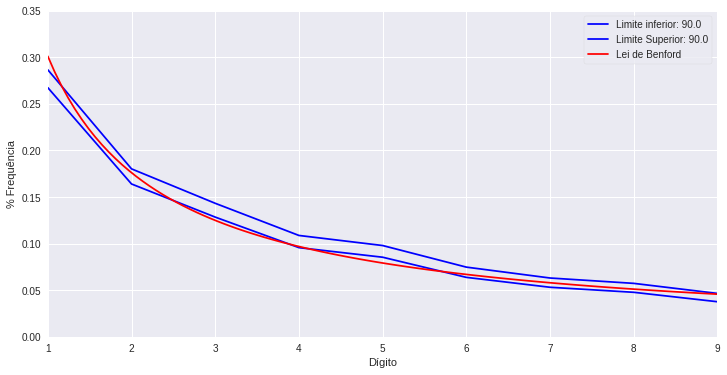

In [48]:
# Plot final results
def plot_results(min_int, max_int):
  """
  Plota os resultados juntamento com o intervalo dado.
  """
  with sns.axes_style("whitegrid"):
      sns.set(rc={'figure.figsize':(12, 6)})
      f, ax = plt.subplots()
      
#       # Plot dos valores observados
#       x_o = observed.index.values.astype(int)
#       y_o = observed.values
#       ax.plot(x_o, y_o, label="Valores observados", c='g')
      
      conf_int = np.round(float(max_int.name) - float(min_int.name), 2) * 100
      # Plot dos valores mínimos esperados
      x_min = min_int.index.values.astype(int)
      y_min = min_int.values
      ax.plot(x_min, y_min, label="Limite inferior: " + str(conf_int), c='b')
      
      # Plot dos valores máximos esperados
      x_max = max_int.index.values.astype(int)
      y_max = max_int.values
      ax.plot(x_max, y_max, label="Limite Superior: " + str(conf_int), c='b')
      
      # Plot da Lei de Bendford
      x = np.linspace(1, 9, 100)
      y = np.log10(1 + (1/x))
      ax.plot(x, y, label = "Lei de Benford", c='r')

      ax.set_xlabel("Dígito")
      ax.set_ylabel("% Frequência")
      ax.set_xticks(x_min)
      ax.set_ylim((0, .35))
      ax.set_xlim((1, 9))
      ax.legend(frameon=True)
      
plot_results(int_95.iloc[0, :], int_95.iloc[1, :])

### <span style="color:blue">**Os resultados seguem a lei de Benford**!</span>

## 2. Dados dos Votos Válidos por Município
Agora, vamos assumir que o número de votos válidos por município tem um comportamento conforme a lei de Benford. 

Mais uma vez os dados foram coletados diretamento do site [TSE](http://www.tse.jus.br/eleicoes/estatisticas/estatisticas-eleitorais) no dia 27 de Outubro de 2018.

Essa tabela possui outros valores bastante interessantes que ainda exploraremos mais adiantes. Porém, inicialmente, vamos aplicar os mesmo passos anteriores para os votos válidos...

In [20]:
# Importa os dados coletados do TSE
url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/aecio_2014_2turn.csv"
votos = pd.read_csv(url, header=0, encoding='latin-1', sep=";")

# Visualização
visualizar(votos)

,UF,Município,Cargo,...,Votos em trânsito,Votos válidos,% votos válidos
0,AC,ACRELÂNDIA,Presidente,...,0,6286,"64,84"
1,AC,ASSIS BRASIL,Presidente,...,0,4082,"51,84"
2,AC,BRASILÉIA,Presidente,...,0,12435,"60,74"
3,AC,BUJARI,Presidente,...,0,5391,66
4,AC,CAPIXABA,Presidente,...,0,4958,"70,51"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 9 columns):
UF                      5701 non-null object
Município               5701 non-null object
Cargo                   5701 non-null object
Turno                   5701 non-null int64
Situação totalização    5701 non-null object
Votos nominais          5701 non-null int64
Votos em trânsito       5701 non-null int64
Votos válidos           5701 non-null int64
% votos válidos         5701 non-null object
dtypes: int64(4), object(5)
memory usage: 400.9+ KB


None

Dessa vez, não temos nenhum valor nulo. Então, vamos apenas filtrar a nossa coluna de interesse.

 - **Votos válidos**: Quantidade de votos válidos naquele município.
 

In [21]:
# Filtra os dados
col2 = "Votos válidos"

# Após o filtro
eleitores = filter_and_clean(votos, col2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5701 entries, 0 to 5700
Data columns (total 1 columns):
Votos válidos    5701 non-null int64
dtypes: int64(1)
memory usage: 89.1 KB
None


 Total:105542273.0




,Votos válidos
0,6286
1,4082
2,12435
3,5391
4,4958
5,34894
6,7513
7,12267
8,2784
9,7313


De acordo com o [G1](http://g1.globo.com/politica/eleicoes/2014/apuracao-votos-presidente.html), 105.542.273 foi o número de votos válidos no segundo turno. Então, está tudo OK. 

Continuando a análise...

Valor mínimo: 7.0
Valor máximo: 6489779.0


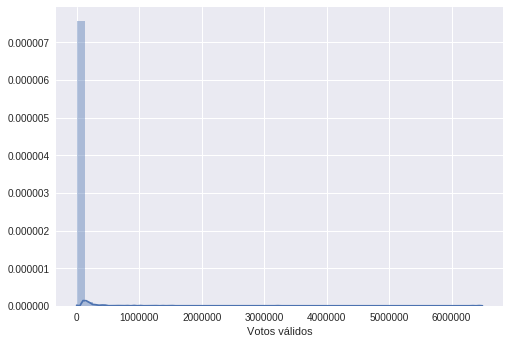

In [22]:
show_dist(votos, col2)

Mais uma vez, os valores possuem uma distribuição de cauda longa e de grande intervalo $[7, 6489779]$.

Assim, calculando as frequencia e plotandos os gráficos.

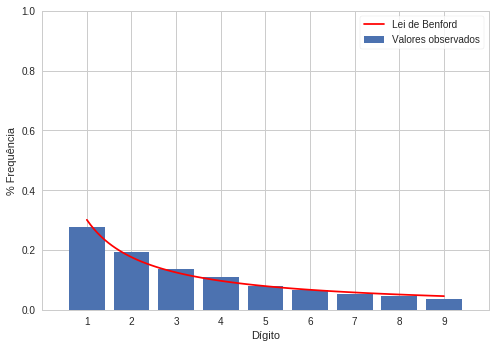

In [23]:
first_digit_freq_2 = fd_freq(votos, col2)

result_vs_benford(first_digit_freq_2, "Porcentagem")

### <span style="color:blue">**Os resultados seguem a lei de Benford**!</span>

## 3. Dados dos Votos Nominais por Cadidato
Até agora estávamos implementando a lei em resultados essencialmente demográficos. Mas agora, vamos aplicá-la diretamente nos números que geraram os resultados das eleições. 

Dessa vez o conjunto de dados sendo analisado é o **número de votos válidos para cada candidato por município no segundo turno da eleição de 2014**. Como temos dois candidatos, vamos ter dois conjuntos de dados.

Mais uma vez, continuando o mesmo passo-a-passo dos outros exemplos.

In [32]:
import pandas as pd

# Importa os dados coletados do TSE
url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/aecio_2014_2turn.csv"
aecio = pd.read_csv(url, header=0, encoding='latin-1', sep=";")

# Visualização
visualizar(aecio)

# Colunas
print(aecio.columns)


,UF,Município,Cargo,...,Votos em trânsito,Votos válidos,% votos válidos
0,AC,ACRELÂNDIA,Presidente,...,0,6286,"64,84"
1,AC,ASSIS BRASIL,Presidente,...,0,4082,"51,84"
2,AC,BRASILÉIA,Presidente,...,0,12435,"60,74"
3,AC,BUJARI,Presidente,...,0,5391,66
4,AC,CAPIXABA,Presidente,...,0,4958,"70,51"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 9 columns):
UF                      5701 non-null object
Município               5701 non-null object
Cargo                   5701 non-null object
Turno                   5701 non-null int64
Situação totalização    5701 non-null object
Votos nominais          5701 non-null int64
Votos em trânsito       5701 non-null int64
Votos válidos           5701 non-null int64
% votos válidos         5701 non-null object
dtypes: int64(4), object(5)
memory usage: 400.9+ KB


None

Index(['UF', 'Município', 'Cargo', 'Turno', 'Situação totalização',
       'Votos nominais', 'Votos em trânsito', 'Votos válidos',
       '% votos válidos'],
      dtype='object')


In [31]:
import pandas as pd

url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/dilma_2014_2turn.csv"
dilma = pd.read_csv(url, header=0, encoding='latin-1', sep=";")


# Visualização
visualizar(dilma)

# Colunas
print(dilma.columns)

,UF,Município,Cargo,...,Votos em trânsito,Votos válidos,% votos válidos
0,AC,ACRELÂNDIA,Presidente,...,0,6286,"35,16"
1,AC,ASSIS BRASIL,Presidente,...,0,4082,"48,16"
2,AC,BRASILÉIA,Presidente,...,0,12435,"39,26"
3,AC,BUJARI,Presidente,...,0,5391,34
4,AC,CAPIXABA,Presidente,...,0,4958,"29,49"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 9 columns):
UF                      5700 non-null object
Município               5700 non-null object
Cargo                   5700 non-null object
Turno                   5700 non-null int64
Situação totalização    5700 non-null object
Votos nominais          5700 non-null int64
Votos em trânsito       5700 non-null int64
Votos válidos           5700 non-null int64
% votos válidos         5700 non-null object
dtypes: int64(4), object(5)
memory usage: 400.9+ KB


None

Index(['UF', 'Município', 'Cargo', 'Turno', 'Situação totalização',
       'Votos nominais', 'Votos em trânsito', 'Votos válidos',
       '% votos válidos'],
      dtype='object')


A coluna de interesse.

 - **Votos nominais**: Quantidade de votos válidos para o cadidato.

In [33]:
# Filtra os dados
col3 = "Votos nominais"


# Após o filtro
aecio = filter_and_clean(aecio, col3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5701 entries, 0 to 5700
Data columns (total 1 columns):
Votos nominais    5701 non-null int64
dtypes: int64(1)
memory usage: 89.1 KB
None


 Total:51041155.0




,Votos nominais
0,4076
1,2116
2,7553
3,3558
4,3496
5,21388
6,4984
7,4934
8,1232
9,3413


In [30]:
dilma = filter_and_clean(dilma, col3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5700 entries, 0 to 5699
Data columns (total 1 columns):
Votos nominais    5700 non-null int64
dtypes: int64(1)
memory usage: 89.1 KB
None


 Total:54501118.0




,Votos nominais
0,2210
1,1966
2,4882
3,1833
4,1462
5,13506
6,2529
7,7333
8,1552
9,3900


Os dados batem com os divulgados pela imprensa <sup>[[3](http://g1.globo.com/politica/eleicoes/2014/apuracao-votos-presidente.html)]</sup>.
- **Aécio:** 51041155 votos.
- **Dilma:** 54501118 votos.


Continuando a análise...

Valor mínimo: 5.0
Valor máximo: 4142529.0


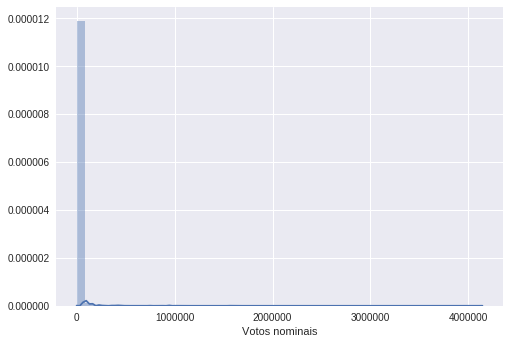

In [28]:
# Distribuições
show_dist(aecio, col3)

Valor mínimo: 1.0
Valor máximo: 2347250.0


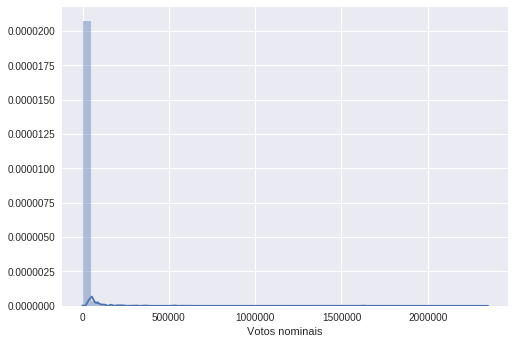

In [29]:
show_dist(dilma, col3)

Aqui os resultados são interessantes. Ambos os valores parecem ser uma distribuição de cauda longa, além de intervalo que varia na mesma ordem de grandeza $A\in[5, 4142529], D\in[1, 234725]$.

Por fim, calculando as frequencia e plotandos os gráficos.

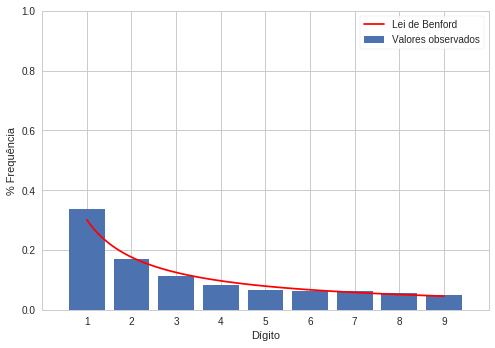

In [35]:
# Aécio
first_digit_freq_3 = fd_freq(aecio, col3)

result_vs_benford(first_digit_freq_3, "Porcentagem")

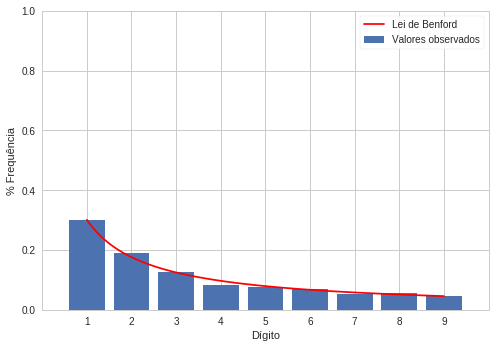

In [34]:
# Dilma
first_digit_freq_4 = fd_freq(dilma, col3)

result_vs_benford(first_digit_freq_4, "Porcentagem")

Hmmm, esses resultados parecem bem próximos do descrito pela lei de Benford. Mas pelas declarações do vídeo inicial, estáva esperando uns resultados mais divergente. Vamos criar umas funções que analisar o